# Lyrics Generator
Is an NLP model that is used to create the lyrics of the words given as input using LSTM in it on Tensorflow.


# 1.Aim
The aim is to create a lyrics inducer for any word given as th input and output as the set of words which which will be the lyrics of the song.



# 2.Setup

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 3. Importing the dataset

In [ ]:
lyric=open('/content/lorde.txt').read()
lyric[:2000]

"Well, summer slipped us underneath her tongue\nOur days and nights are perfumed with obsession\nHalf of my wardrobe is on your bedroom floor\nUse our eyes, throw our hands overboard I am your sweetheart psychopathic crush\nDrink up your movements, still I can't get enough\nI overthink your p-punctuation use\nNot my fault, just a thing that my mind do A rush at the beginning\nI get caught up, just for a minute\nBut lover, you're the one to blame, all that you're doing\nCan you hear the violence?\nMegaphone to my chest Broadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it Our thing progresses, I call and you come through\nBlow all my friendships to sit in hell with you\nBut we're the greatest, they'll hang us in the Louvr

# 4.Pre processing

In [ ]:
corpus=lyric.lower().split('\n')
for i in range(40,60):
    print(corpus[i])

watch the wasters blow the speakers
spill my guts beneath the outdoor light
it's just another graceless night
i hate the headlines and the weather
i'm nineteen and i'm on fire
but when we're dancing i'm alright
it's just another graceless night are you lost enough?
have another drink, get lost in us
this is how we get notorious, oh
'cause i don't know
if they keep tellin' me where to go
i'll blow my brains out to the radio, oh all of the things we're taking
'cause we are young and we're ashamed
send us to perfect places
all of our heroes fading
now i can't stand to be alone
let's go to perfect places every night, i live and die
meet somebody, take 'em home
let's kiss and then take off our clothes
it's just another graceless night, 'cause all of the things we're taking


# 5.Code mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 6.Tokenizing

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

1372

# 7.Creating Sequences

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


In [ ]:
for i in range(20):
    print(input_sequences[i])

[112, 196]
[112, 196, 703]
[112, 196, 703, 42]
[112, 196, 703, 42, 568]
[112, 196, 703, 42, 568, 180]
[112, 196, 703, 42, 568, 180, 569]
[22, 165]
[22, 165, 4]
[22, 165, 4, 181]
[22, 165, 4, 181, 36]
[22, 165, 4, 181, 36, 704]
[22, 165, 4, 181, 36, 704, 21]
[22, 165, 4, 181, 36, 704, 21, 705]
[706, 13]
[706, 13, 9]
[706, 13, 9, 707]
[706, 13, 9, 707, 40]
[706, 13, 9, 707, 40, 27]
[706, 13, 9, 707, 40, 27, 19]
[706, 13, 9, 707, 40, 27, 19, 439]


# 8.Padding

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
padding='pre'))
print(max_sequence_len)
print(input_sequences)

29
[[  0   0   0 ...   0 112 196]
 [  0   0   0 ... 112 196 703]
 [  0   0   0 ... 196 703  42]
 ...
 [  0   0   0 ... 207 140 140]
 [  0   0   0 ... 140 140 140]
 [  0   0   0 ... 140 140 140]]


# 9.Building the model

In [ ]:
model = Sequential()
model.add(Embedding(1372, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1372/2, activation='relu', kernel_regularizer=regularizers.l2(0.001
)))
model.add(Dense(1372, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 160)           219520    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 28, 400)           577600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 400)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 686)               69286     
_________________________________________________________________
dense_3 (Dense)              (None, 1372)              942564    
Total params: 2,009,370
Trainable params: 2,009,370
Non-trainable params: 0
____________________________________________

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

# 10. Training the model

In [ ]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
380/380 [==============================] - 95s 237ms/step - loss: 5.9840 - accuracy: 0.0521
Epoch 2/50
380/380 [==============================] - 90s 236ms/step - loss: 5.4261 - accuracy: 0.0570
Epoch 3/50
380/380 [==============================] - 90s 236ms/step - loss: 5.0919 - accuracy: 0.0772
Epoch 4/50
380/380 [==============================] - 90s 236ms/step - loss: 4.7865 - accuracy: 0.1042
Epoch 5/50
380/380 [==============================] - 90s 236ms/step - loss: 4.5150 - accuracy: 0.1391
Epoch 6/50
380/380 [==============================] - 90s 237ms/step - loss: 4.2447 - accuracy: 0.1768
Epoch 7/50
380/380 [==============================] - 90s 237ms/step - loss: 4.0093 - accuracy: 0.2115
Epoch 8/50
380/380 [==============================] - 90s 236ms/step - loss: 3.7785 - accuracy: 0.2451
Epoch 9/50
380/380 [==============================] - 90s 236ms/step - loss: 3.5769 - accuracy: 0.2724
Epoch 10/50
380/380 [==============================] - 90s 236ms/step - l

# 11.Analysing the results

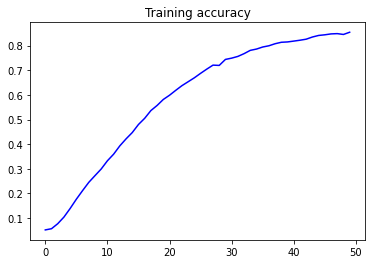

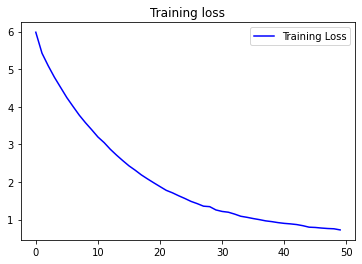

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# 12.Saving the model

In [ ]:
model.save('lyrics_generator.h5')

# 13.Loading the model

In [ ]:
from keras.models import load_model
loaded_model=load_model('lyrics_generator.h5')

In [ ]:
next_words=50
seed_text='diamond in the flash'

In [ ]:
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

In [ ]:
lyrics(next_words,seed_text)

diamond in the flash shoulder blades in double time and now people talk to me i'm slipping out of reach now people talk to me i'm slipping out of reach it it it it it it it alone all it it feels go up it it didn't stand to big fun again it down


# Saving the model in json

In [ ]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2021-05-30 16:24:11.786981: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Loading the model from json

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 160)           219520    
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 400)           577600    
_________________________________________________________________
dropout (Dropout)            (None, 28, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 686)               69286     
_________________________________________________________________
dense_1 (Dense)              (None, 1372)              942564    
Total params: 2,009,370
Trainable params: 2,009,370
Non-trainable params: 0
______________________________________________

In [ ]:
next_words = 100
seed_text = "diamond in the flash"

In [ ]:
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

In [ ]:
lyrics(next_words,seed_text)

diamond in the flash shoulder blades in double time and now people talk to me i'm slipping out of reach now people talk to me i'm slipping out of reach it it it it it it it alone all it it feels go up it it didn't stand to big fun again it down it it feels better biting down skip a hit don't make a sound up in your fun go knows it it feels go go go big eyes it behind you way it be in love it and the fun go it it it it it it it feels love it


In [ ]:
next_words=50

In [ ]:
seed_text

'i am an owl'

In [ ]:
seed_text="hey you are a"

In [ ]:
lyrics(next_words,seed_text)

hey you are a supercut of us chorus 1 but what about love it and everything works out so good drown the louvre okay in our numbers do a million liar those great whites they have big teeth night and gold teeth teens are out that slow burn wait while j minute divine on clean teeth left on repeat well summer slipped us underneath her tongue don't see on screen to even in the beginning pavement do no wouldn't can be without you acting on the truth is i am a toy that people enjoy but what about reach now i reveled without a
